File loaded successfully.

--- First 5 Rows of Data ---
          Time  Nano_1_Temp  Nano_1_Hum  Nano_2_Temp  Nano_2_Hum  Uno_1_Temp  \
0   0:00:00 AM           23          88           21          87          24   
1   1:00:00 AM           22          89           22          89          21   
2   2:00:00 AM           25          92           22          91          25   
3   3:00:00 AM           26          95           25          96          26   
4   4:00:00 AM           27          95           27          95          25   

   Uno_1_Hum  Uno_2_Temp  Uno_2_Hum  
0         88          21         89  
1         91          24         92  
2         92          25         92  
3         97          25         97  
4         95          26         94  

--- Data Information (Types, Non-Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0

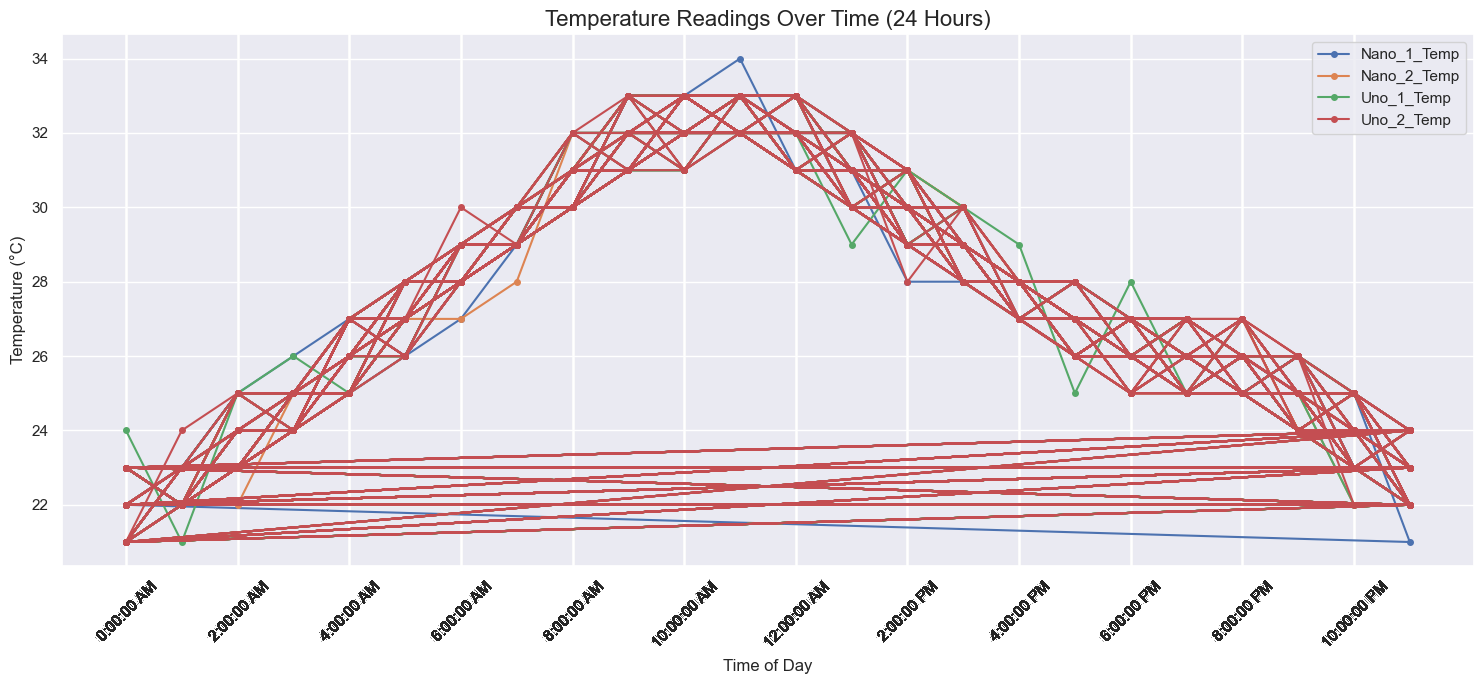


Plotting Humidity Trends...


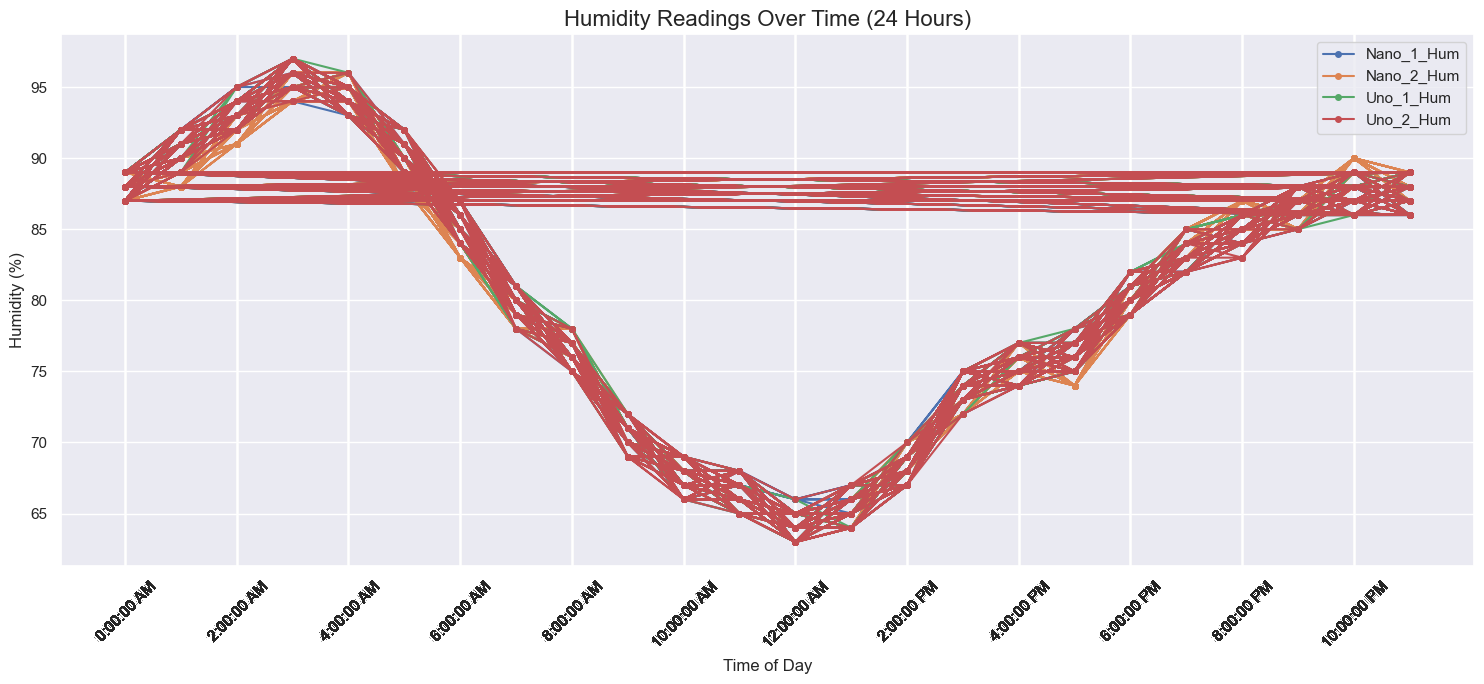


Plotting Temperature Distributions...


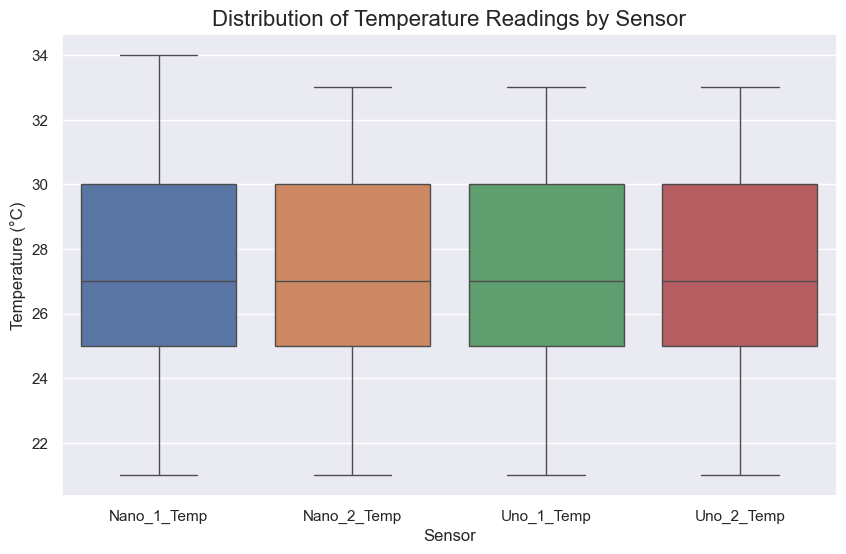


Plotting Humidity Distributions...


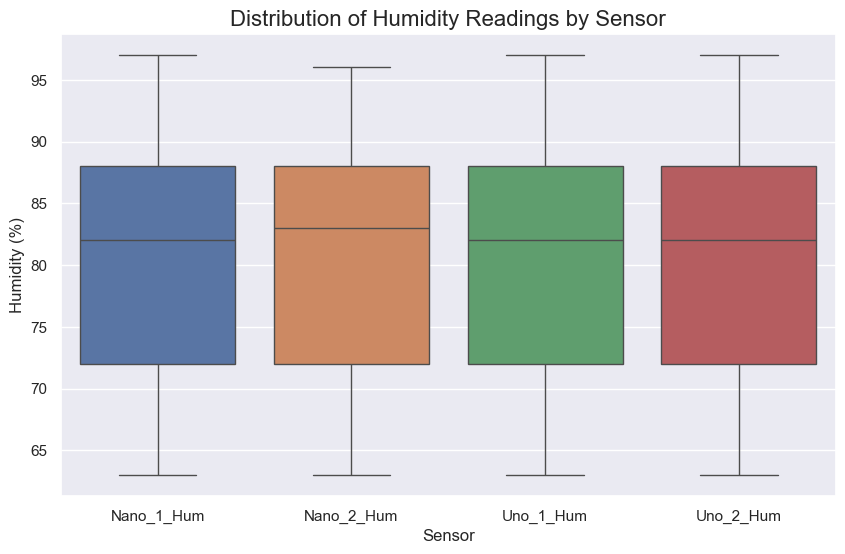


Calculating and Plotting Correlation Heatmap...


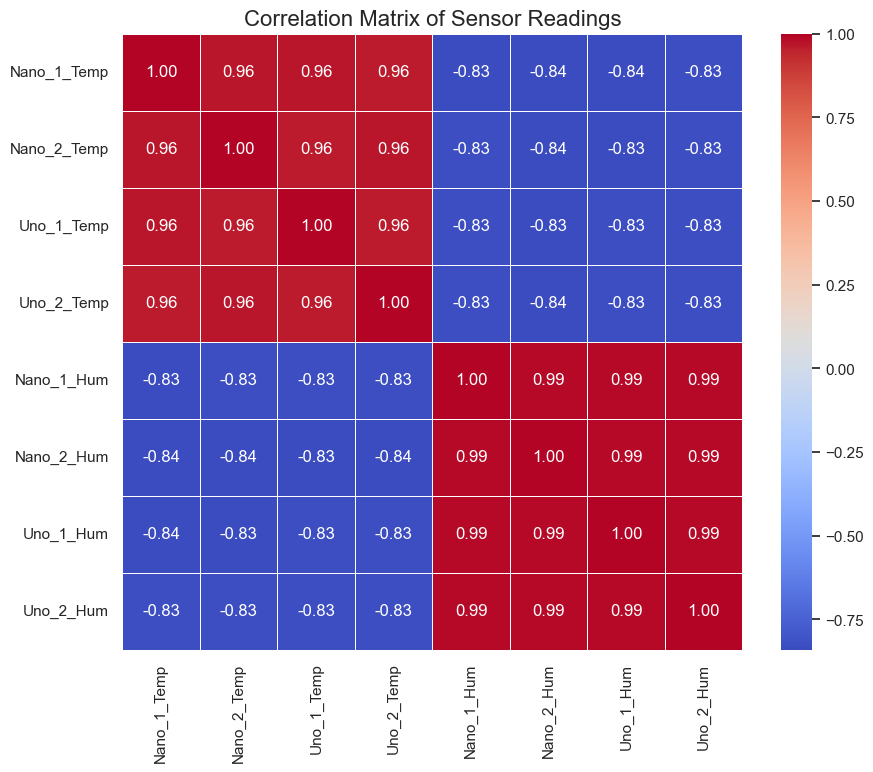


Plotting Pairplot for Nano_1 and Uno_1 sensors...


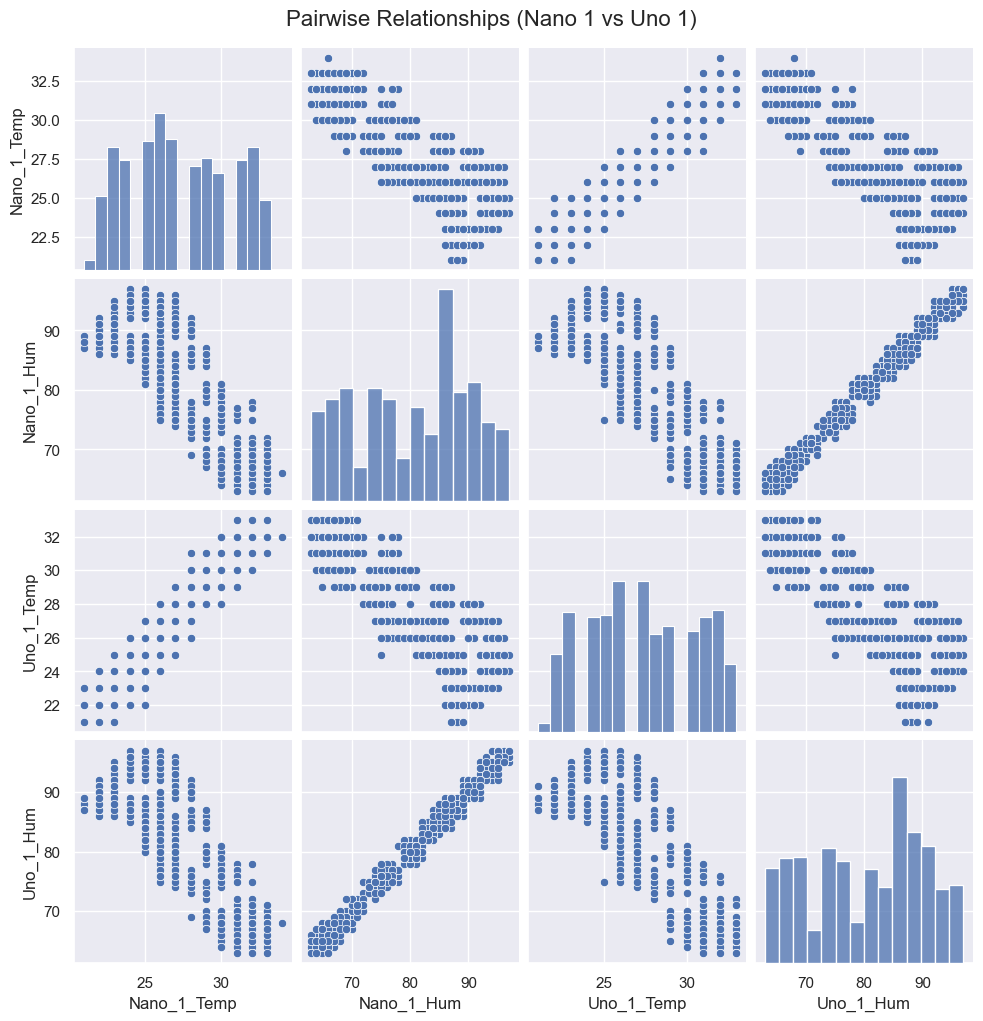

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
# Define the correct file path
file_path = "C:/Users/Admin/OneDrive/Desktop/arduino_nano_uno.xlsx"

# Define meaningful column names based on the data pattern
# (Time, Temp1, Hum1, Temp2, Hum2, Temp3, Hum3, Temp4, Hum4)
column_names = [
    'Time',
    'Nano_1_Temp', 'Nano_1_Hum',
    'Nano_2_Temp', 'Nano_2_Hum',
    'Uno_1_Temp', 'Uno_1_Hum',
    'Uno_2_Temp', 'Uno_2_Hum'
]

# Load the CSV file, specifying no header is present
try:
    df = pd.read_excel(file_path, header=None, names=column_names)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the file is in the same directory as your notebook, or provide the full path.")
    # Exit or raise error if in a script, in notebook just stop this cell
    # In a notebook, the rest of the code will fail, which is expected.
except Exception as e:
    print(f"An error occurred: {e}")

# --- 2. Inspect Data ---
if 'df' in locals():
    print("\n--- First 5 Rows of Data ---")
    print(df.head())

    print("\n--- Data Information (Types, Non-Nulls) ---")
    df.info()

    print("\n--- Descriptive Statistics ---")
    # We describe only the numerical (sensor) columns
    print(df.describe())

    # Separate temperature and humidity columns for easier plotting
    temp_cols = [col for col in df.columns if 'Temp' in col]
    hum_cols = [col for col in df.columns if 'Hum' in col]

# --- 3. Data Visualization ---
# Set plot style for better aesthetics
sns.set(style="darkgrid")

if 'df' in locals():
    # Plot 1: Temperature Trends Over Time
    print("\nPlotting Temperature Trends...")
    plt.figure(figsize=(15, 7))
    for col in temp_cols:
        plt.plot(df['Time'], df[col], label=col, marker='o', markersize=4)
    plt.title('Temperature Readings Over Time (24 Hours)', fontsize=16)
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.xticks(rotation=45, ticks=df['Time'][::2]) # Show every 2nd hour label
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot 2: Humidity Trends Over Time
    print("\nPlotting Humidity Trends...")
    plt.figure(figsize=(15, 7))
    for col in hum_cols:
        plt.plot(df['Time'], df[col], label=col, marker='o', markersize=4)
    plt.title('Humidity Readings Over Time (24 Hours)', fontsize=16)
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Humidity (%)', fontsize=12)
    plt.xticks(rotation=45, ticks=df['Time'][::2]) # Show every 2nd hour label
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot 3: Temperature Distribution (Box Plots)
    print("\nPlotting Temperature Distributions...")
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[temp_cols])
    plt.title('Distribution of Temperature Readings by Sensor', fontsize=16)
    plt.xlabel('Sensor', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.show()

    # Plot 4: Humidity Distribution (Box Plots)
    print("\nPlotting Humidity Distributions...")
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[hum_cols])
    plt.title('Distribution of Humidity Readings by Sensor', fontsize=16)
    plt.xlabel('Sensor', fontsize=12)
    plt.ylabel('Humidity (%)', fontsize=12)
    plt.show()

    # Plot 5: Correlation Heatmap
    print("\nCalculating and Plotting Correlation Heatmap...")
    # Calculate correlation matrix for sensor data
    corr_matrix = df[temp_cols + hum_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Sensor Readings', fontsize=16)
    plt.show()

    # Plot 6: Pairplot for a subset (e.g., Nano 1 vs Uno 1)
    print("\nPlotting Pairplot for Nano_1 and Uno_1 sensors...")
    subset_cols = ['Nano_1_Temp', 'Nano_1_Hum', 'Uno_1_Temp', 'Uno_1_Hum']
    sns.pairplot(df[subset_cols])
    plt.suptitle('Pairwise Relationships (Nano 1 vs Uno 1)', y=1.02, fontsize=16)
    plt.show()

else:
    print("\nDataframe 'df' not found. Please check the file loading step.")